# Shopping Trend Analysis

In [26]:
#importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [28]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is BC3B-6CC3

 Directory of D:\ShadowFox

31-03-2025  12:19    <DIR>          .
31-03-2025  12:19    <DIR>          ..
31-03-2025  11:45    <DIR>          .ipynb_checkpoints
25-03-2025  21:14            40,158 delhiaqi.csv
18-12-2024  18:30           416,614 shopping_trends_updated.csv
29-03-2025  20:39           808,006 Task_1.ipynb
31-03-2025  11:44         1,339,087 Task_2.ipynb
31-03-2025  12:19            20,381 Task_3.ipynb
               5 File(s)      2,624,246 bytes
               3 Dir(s)  306,753,347,584 bytes free


In [30]:
# Load the dataset
df = pd.read_csv("shopping_trends_updated.csv")

In [32]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [33]:
# displaying 5 rows
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [34]:
# Check for missing values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Define research questions
###   1. What are the most popular product categories?
###   2. How do shopping trends vary by season?
###   3. What is the impact of discounts on sales?
###  4. What are the peak shopping hours?
###  5. How does customer age group influence purchasing behavior?
###  6. What is the relationship between review ratings and sales?
###  "7. How does the payment method affect purchase frequency,###  "8. What is the impact of subscription status on shopping behavio?"

In [35]:
# Summary Statistics
df.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [36]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [37]:
df.columns = df.columns.str.strip()  # Removes extra spaces

# Visualizing the distribution of product categories
plt.figure(figsize=(10,5))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette='magma')
plt.title("Most Popular Product Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

#### The overall distribution customer ages in the dataset

In [38]:
df['Age'].value_counts() #name of dataframe[column].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [39]:
df['Age'].mean()

44.06846153846154

In [40]:
df['Age_category']=pd.cut(df['Age'],bins=[0,15,18,30,50,70],
labels=['child','teen','Young Adults','Middle-Aged Adults','Old'])

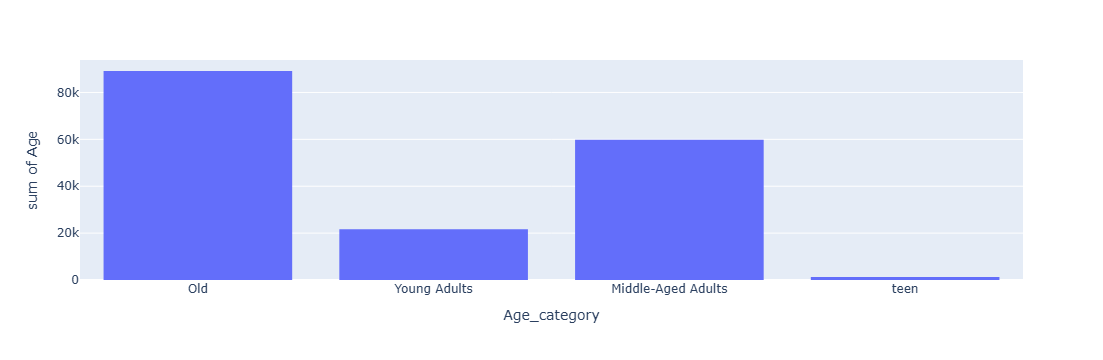

In [41]:
fig=px.histogram(df,y='Age',x='Age_category')
fig.show()

#### The average purchase amount vary across different product categories

In [42]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [43]:
df[['Category','Purchase Amount (USD)']]

,Category,Purchase Amount (USD)
0,Clothing,53
1,Clothing,64
2,Clothing,73
3,Footwear,90
4,Clothing,49
...,...,...
3895,Clothing,28
3896,Accessories,49
3897,Accessories,33
3898,Footwear,77


In [44]:
df.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [45]:
df.groupby('Category')['Purchase Amount (USD)'].sum()

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

#### Which gender has the highest number of purchases

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

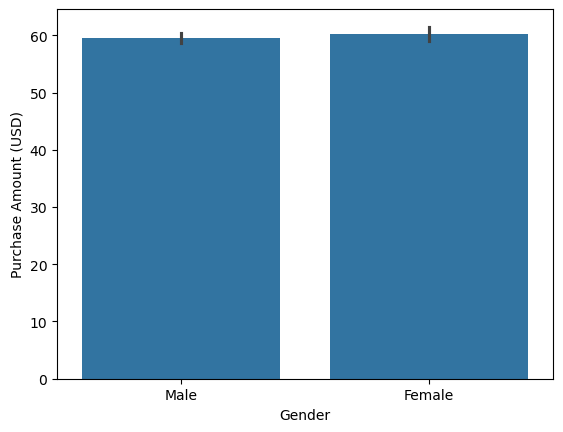

In [46]:
sns.barplot(df, x='Gender', y='Purchase Amount (USD)')

#### The most commonly purchased item in each category

In [47]:
df.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

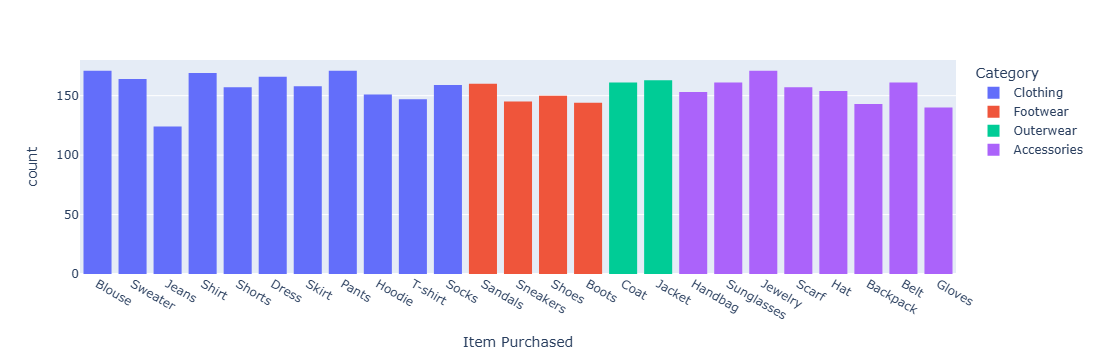

In [48]:
fig=px.histogram(df,x='Item Purchased',color='Category')
fig.show()

#### Specific seasons or months where customer spending is significantly higher

In [49]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [50]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

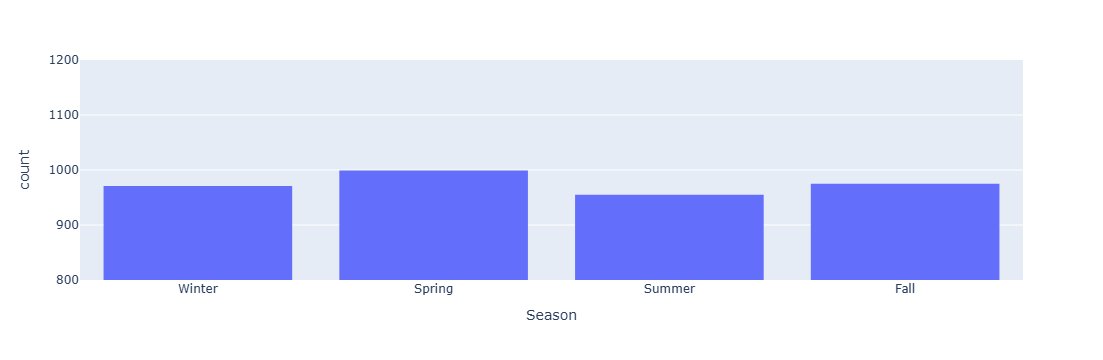

In [51]:
fig = px.histogram(df , x = 'Season' , range_y= [800 , 1200] )
fig.show()

#### The average rating given by customers for each product category

In [52]:
df.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [53]:
shop_groupby = df.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


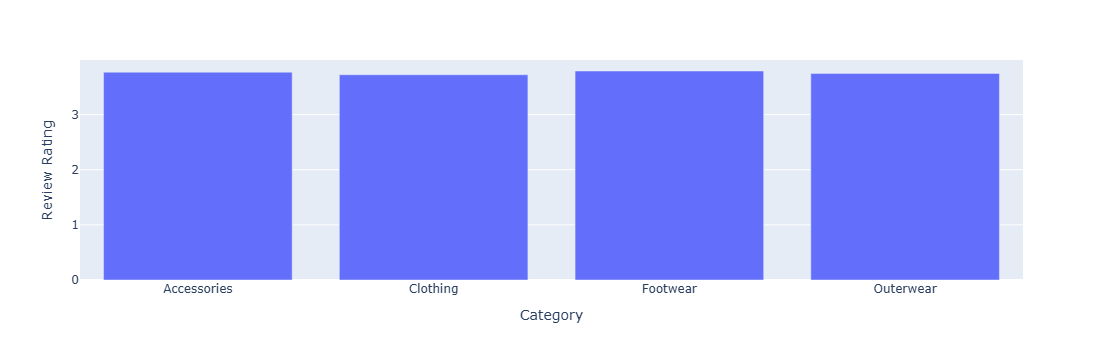

In [54]:
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

#### The notable differences in purchase behavior between subscribed and non-subscribed customers

In [55]:
df['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

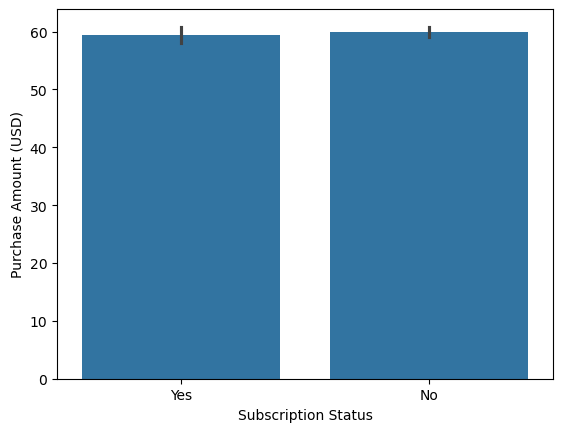

In [57]:
sns.barplot(df  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [58]:
df['Purchase Amount (USD)'].sum()

233081

In [59]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

#### Which payment method is the most popular among customers

In [60]:
df.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [61]:
shop_groupby = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

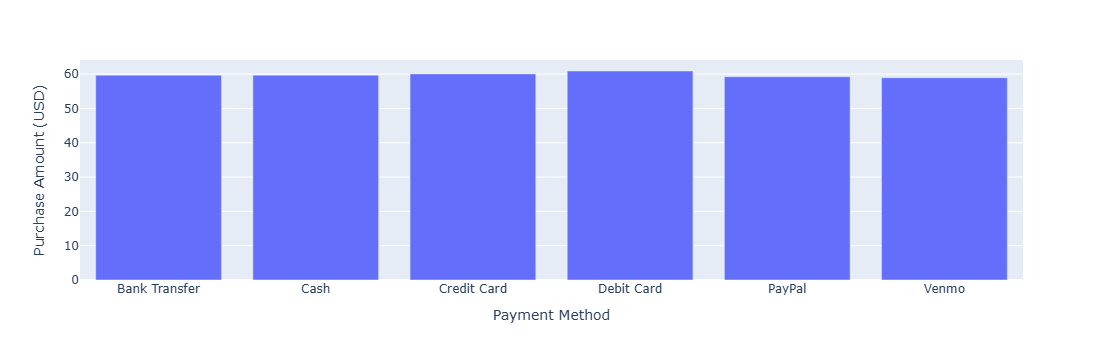

In [62]:
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')

fig.show()

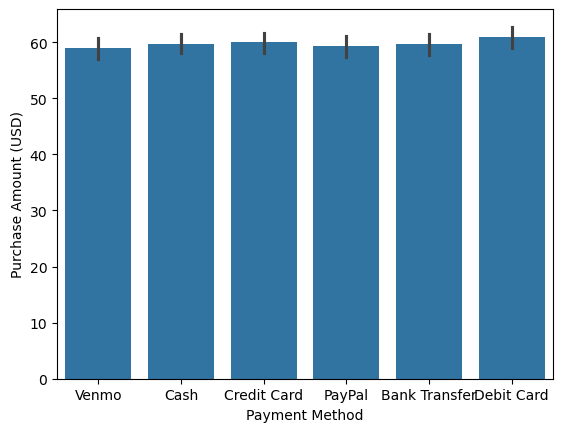

In [63]:
sns.barplot(df ,x='Payment Method' , y = 'Purchase Amount (USD)')
plt.show()

#### Customers who use promo codes tend to spend more than those who don't

In [64]:
shop_groupby  = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

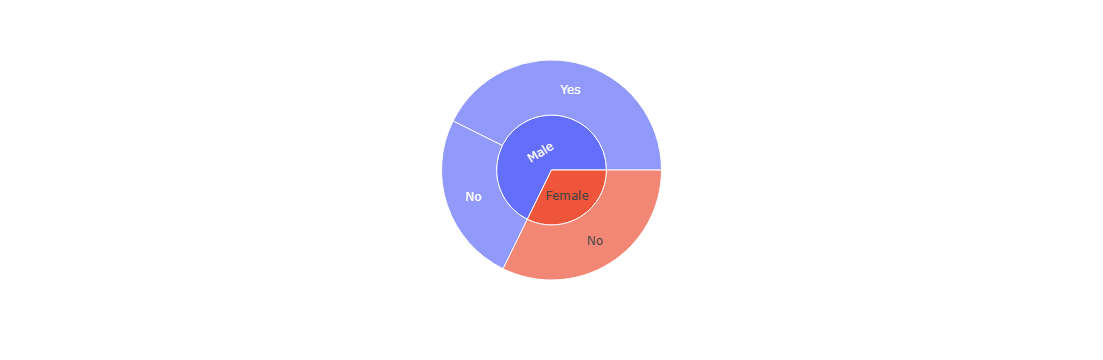

In [65]:
fig = px.sunburst(df , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

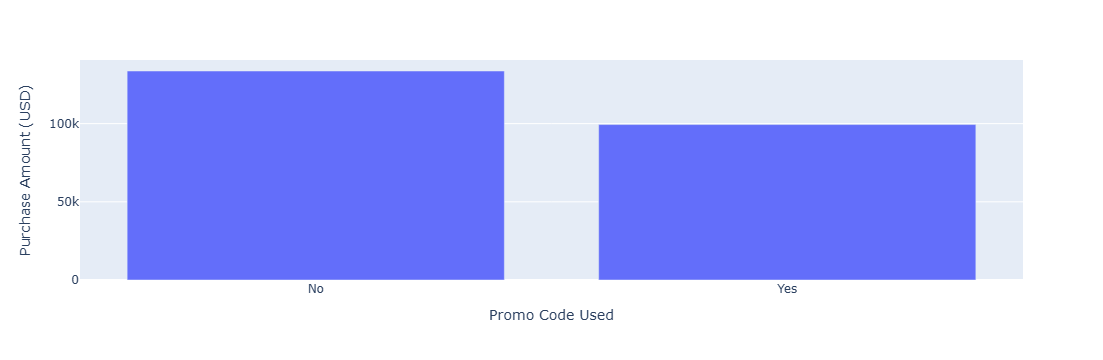

In [66]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

#### The frequency of purchases vary across different age groups

In [67]:
df[['Age' , 'Age_category']]

,Age,Age_category
0,55,Old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,Old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [68]:
df['Age_category'].unique()

['Old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'Old']

In [69]:
shop_group = df.groupby('Frequency of Purchases')['Age'].sum()

C:\anaconda\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



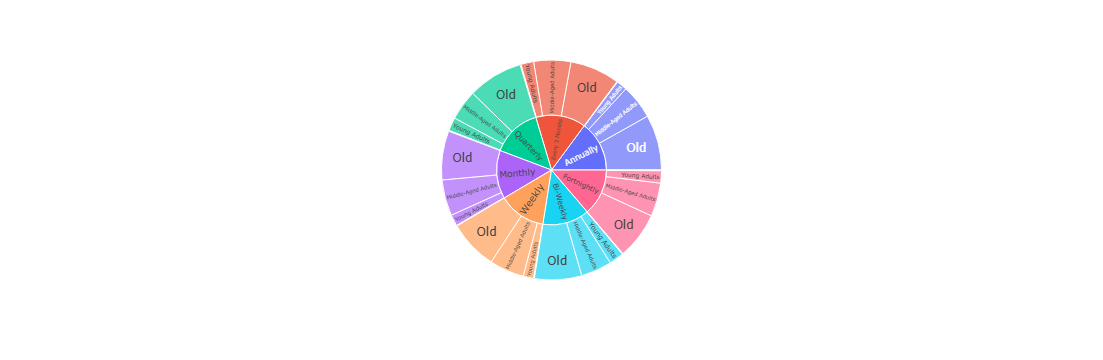

In [70]:
px.sunburst(df , path=['Frequency of Purchases','Age_category'] , values='Age')

#### correlations between the size of the product and the purchase amount

In [71]:
shop_group = df.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

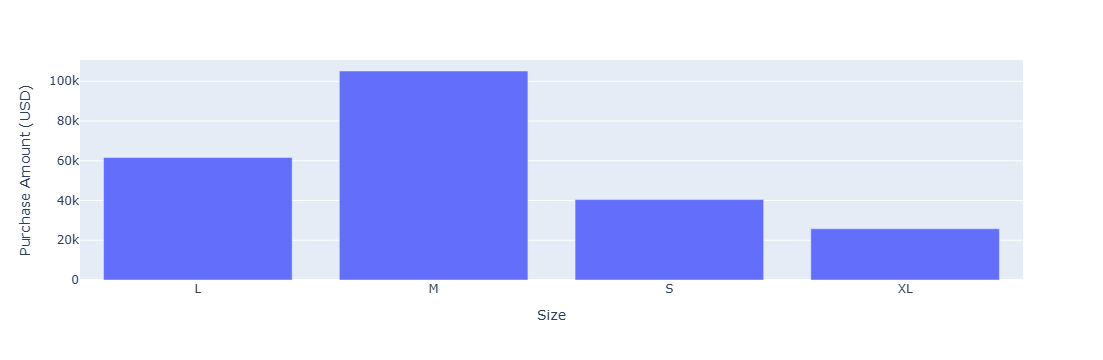

In [72]:
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

#### Which shipping type is preferred by customers for different product categories

In [73]:
df.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [74]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

#### How does the presence of a discount affect the purchase decision of customers

In [75]:
shop_group = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()


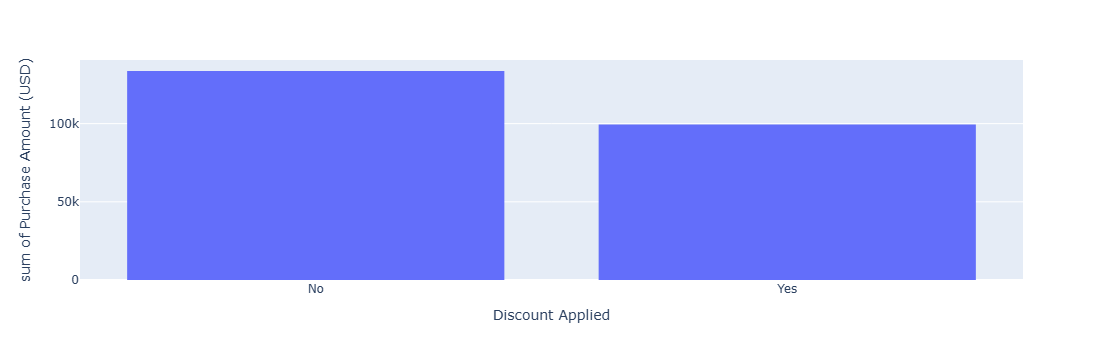

In [76]:
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

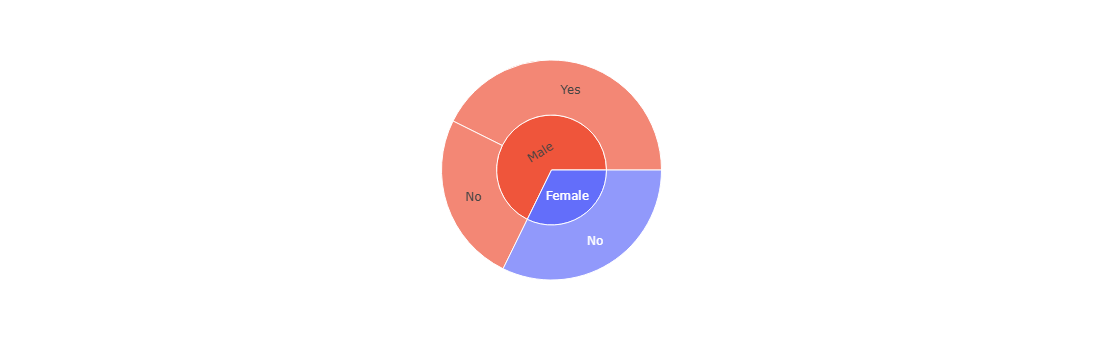

In [77]:
fig = px.sunburst(df , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

#### Are there any specific colors that are more popular among customers

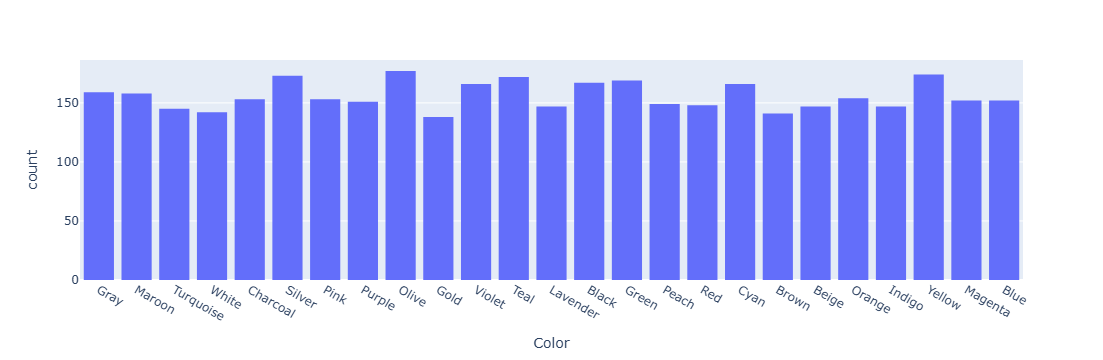

In [79]:
px.histogram(df , x = 'Color')

In [80]:
df['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

#### The average number of previous purchases made by customers

In [81]:
df['Previous Purchases'].mean()

25.35153846153846

#### How does the purchase amount differ based on the review ratings given by customers

In [83]:
df.groupby('Review Rating')['Purchase Amount (USD)'].mean()

Review Rating
2.5    62.287879
2.6    59.566038
2.7    59.363636
2.8    57.066176
2.9    56.470588
3.0    60.728395
3.1    58.770701
3.2    61.315789
3.3    59.861842
3.4    59.005495
3.5    58.833333
3.6    57.322148
3.7    58.974359
3.8    60.873239
3.9    58.926380
4.0    59.237569
4.1    61.959459
4.2    60.853801
4.3    59.673469
4.4    60.525316
4.5    59.489209
4.6    57.683908
4.7    59.283784
4.8    61.881944
4.9    63.885542
5.0    64.352941
Name: Purchase Amount (USD), dtype: float64

#### Any noticeable differences in purchase behavior between different locations

In [84]:
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [85]:
shop_group = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

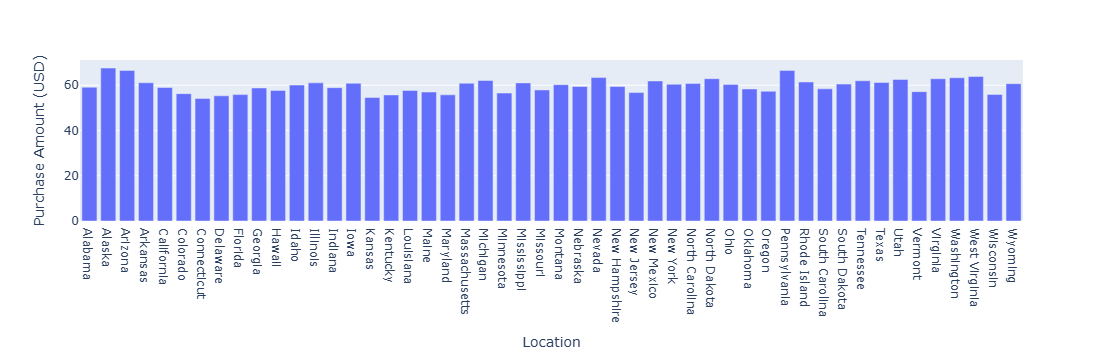

In [86]:
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

#### Relationship between customer age and the category of products they purchase

In [88]:
shop_group = df.groupby('Category')['Age'].mean().reset_index()

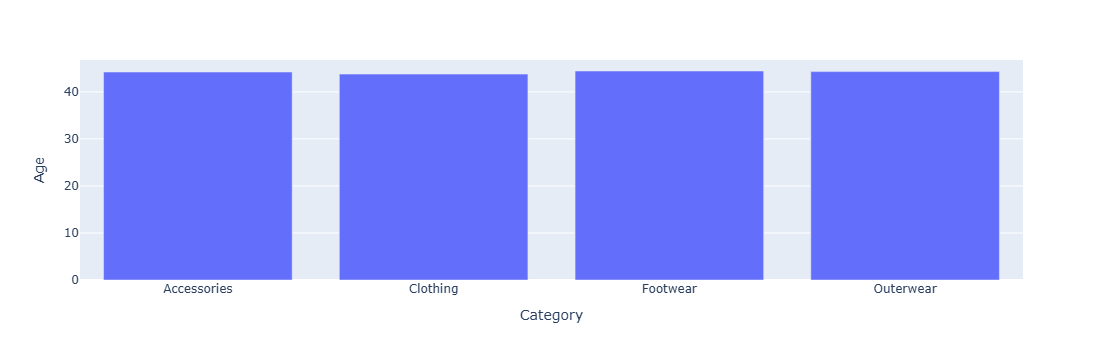

In [89]:
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

#### How does the average purchase amount differ between male and female customers

In [90]:
shop_group = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

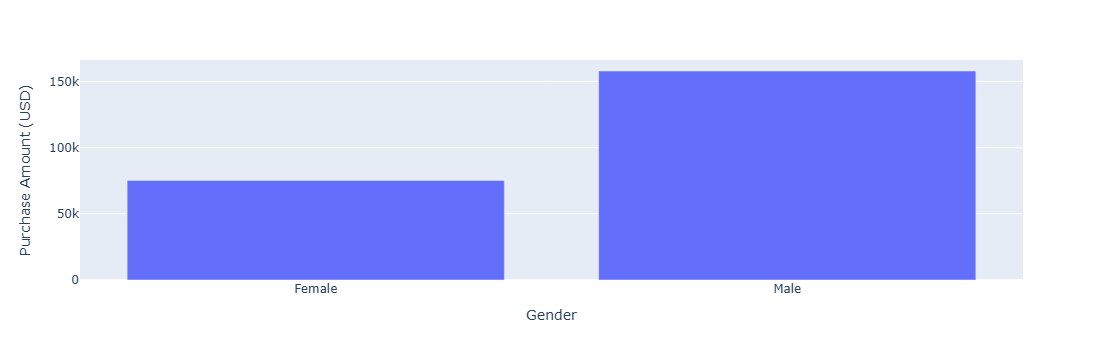

In [91]:
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

C:\anaconda\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



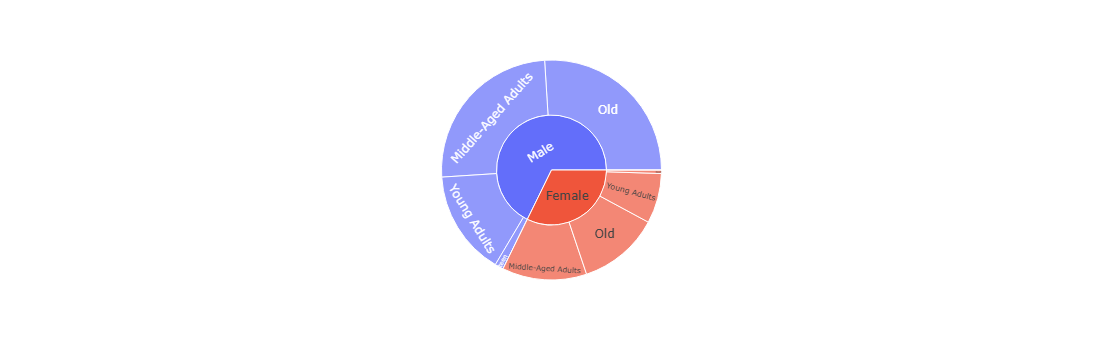

In [92]:
px.sunburst(data_frame= df, path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')